In [ ]:
### These codes are for the MDPI_Water paper-Is Clustering Time-series Water Depth Useful? An Exploratory Study for Flooding Detection in Urban Drainage Systems

# Developer： Jiada Li
# Date: 2019/09/21
# Org: Urban Water Group, University of Utah
# Info: use K-means cluster algorithm to cluter the simulated nodal water depth; The number of sensor can be identified by this script

In [ ]:
### Step1: Import the required modules 

import pandas as pd
import numpy as np
from time import time

#Import plots modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#plt.style.use('default')
#plt.style.use('seaborn-white')
#plt.style.use('seaborn')
#plt.style.use('ggplot')

# use seaborn plotting defaults
import seaborn as sns; sns.set()
plt.style.use('default')

# Create color maps
from matplotlib.colors import ListedColormap
color_array = ["#984ea3","#a65628","#ffff33","#4daf4a","#ff7f00", "#e41a1c", "#377eb8"]
# coloor_array = ["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"]
cmap = ListedColormap(color_array)

# Mount the local storage drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
###Step 2: Put simulated water depth or overlow datasets to 'gdrive/My Drive/SH Sensor' folder and read them



#depth_10yr3hr = pd.read_csv('gdrive/My Drive/SH Sensor/WD_2010.csv') ## we need long-term simulation data. Maybe 24hr or 48hr

#2.1 3hr duration rainfall scenarios
depth_5yr3hrs = pd.read_csv('gdrive/My Drive/SH Sensor/5yr_3hrs.csv')


#2.2 12hr duration rainfall scenarios
depth_5yr12hrs = pd.read_csv('gdrive/My Drive/SH Sensor/5yr_12hrs.csv')

#depth_200yr12hrs.head()

#2.3 48hr duration rainfall scenarios
depth_5yr48hrs = pd.read_csv('gdrive/My Drive/SH Sensor/5yr_48hrs.csv')


#depth_200yr48hrs.head()

depth = pd.DataFrame(depth_5yr12hrs)
# Drop Hours Column
#depth_1yr48hrs.drop(columns=['Hours     '])

# Transpose (rotate) data from rows to column
depth = depth.T

depth.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143
1,3.33,2.35,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,...,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.40,2.39,2.39,2.39,2.38,2.37,2.37,2.36,2.36,2.35,2.35,2.34,2.34,2.33
2,3.94,2.65,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,...,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.68,2.68,2.67,2.66,2.66,2.65,2.65,2.64,2.64,2.63,2.63,2.62
3,4.13,2.73,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,...,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.78,2.77,2.77,2.76,2.75,2.75,2.74,2.73,2.73,2.72,2.72,2.71,2.71
4,4.67,3.02,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,...,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.09,3.08,3.08,3.07,3.06,3.05,3.05,3.04,3.03,3.03,3.02,3.02,3.01
5,5.08,3.50,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,...,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.59,3.58,3.58,3.57,3.56,3.55,3.54,3.54,3.53,3.52,3.52,3.51,3.51


In [ ]:
###Step 3 Datasets pre-processing

#3.1 Create a variable called col_t with 'Hours' string
#col_d = 'Hours     '

#3.1 Use list comprehension to get a list of all the columns excluding the 'Hours' columns
col_f = list([ i for i in depth.keys()])

#depth_1yr3hr[col_f].head()
#depth_1yr3hr[col_T].head()
X = depth[col_f]
X = np.array(X)

# What is it for?
#y = depth_1yr48hrs[col_d]
#y = np.array(y)

In [ ]:
#3.2 Use PCA to reduce dimensionality of datasets to 2D

from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten=True, random_state=42)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

X
X_pca
print (X_pca.shape)

original shape:    (60, 144)
transformed shape: (60, 2)
(60, 2)


In [ ]:
### Step 4 Implement Kmeans cluster algorithm and make prediction


#4.1 create Kmeans cluster estimator
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, n_init=10, init='random', max_iter=5) # initilize model with 2 cluster numbers, but it is better to make random number 

#K-means function parameters:
#n_clusters: 𝑘=2 clusters;
#n_init: only one initialization;  Number of time the k-means algorithm will be run with different centroid seeds
#init: random initialization; 'random' picks k random points for initial cluster seeds; 'k-means++'' (the default) uses the k-means++ algorithm to"spread out" the initial seeds
#max_iter: only 5 iteration.

#4.2 fit model and predict 
y_pred=kmeans_model.fit_predict(X_pca)

#4.3 create true labels
from scipy.stats import mode

y_true = np.ones_like(y_pred)

y_pred
#y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

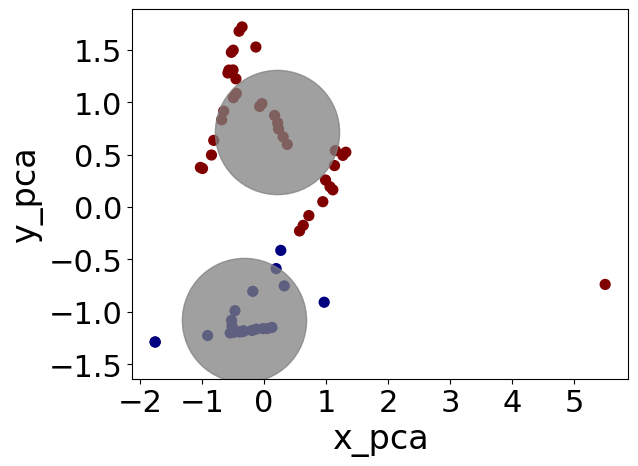

In [ ]:
###Step 5: visualize the X-results with the initial Kemans model (n=2)                        

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred,  marker="o", s=50, cmap='jet')

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='gray', s=8000, alpha=0.75)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlabel('x_pca', fontsize = 24)
plt.ylabel('y_pca', fontsize = 24);

In [ ]:
###Step 6:  From the plot above, we can find that n=2 is not the best parameter setting, we need to find the best n or k value to optimize the model performance.

# Firstly, Let's look  at these scores for a couple of different parameters of Kmeans model and select model is the best performance.
from sklearn.metrics import silhouette_samples, silhouette_score

models = [KMeans(n_clusters=4), 
         KMeans(n_clusters=12),
         KMeans(n_clusters=10),
         KMeans(n_clusters=8),
         KMeans(n_clusters=6)]
h = np.zeros([len(models),3])
for i,m in enumerate(models):
    y_pred = m.fit_predict(X_pca)
    h[i,:] = silhouette_score(X_pca, y_pred)
    print(h[i,:])

print('The winner is model #' + str(np.argmax(h[:,0]))
      + ' with silhouette score ' + str(np.max(h[:,0])))
print('Method details:')
print(models[np.argmax(h[:,0])])

[0.57359019 0.57359019 0.57359019]
[0.51571259 0.51571259 0.51571259]
[0.52234754 0.52234754 0.52234754]
[0.61237569 0.61237569 0.61237569]
[0.51271008 0.51271008 0.51271008]
The winner is model #3 with silhouette score 0.6123756884921574
Method details:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


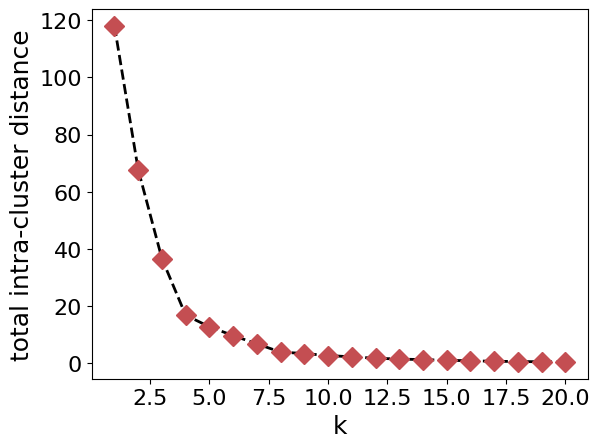

In [ ]:
###Step 7: Step 6 doesn't give me the best n value since step 6 still shows that 'k=2' is the best setting.  Alternatively, Secondly, let's try intra-cluster distance curve to find best k (the number of cluster)

# clusters number for k = 1 to k = 15

ks = range(1,21)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(X_pca)
    scores.append(-model.score(X_pca))

plt.plot(ks, scores,linestyle='--', marker='D', linewidth=2, markersize=10, mec ='r', mfc = 'r', color = 'black')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('total intra-cluster distance', fontsize = 18)
plt.xlabel('k', fontsize= 18)
plt.show()

#We can see that the total intra-cluster distance is large for 𝑘=1 and decreases as we increase 𝑘, until 𝑘=15, after which it tapers of and gets only marginally smaller. 

# This indicates that 𝑘=8 is a good choice

For n_clusters = 5 The silhouette_score is : 0.5853478158004612


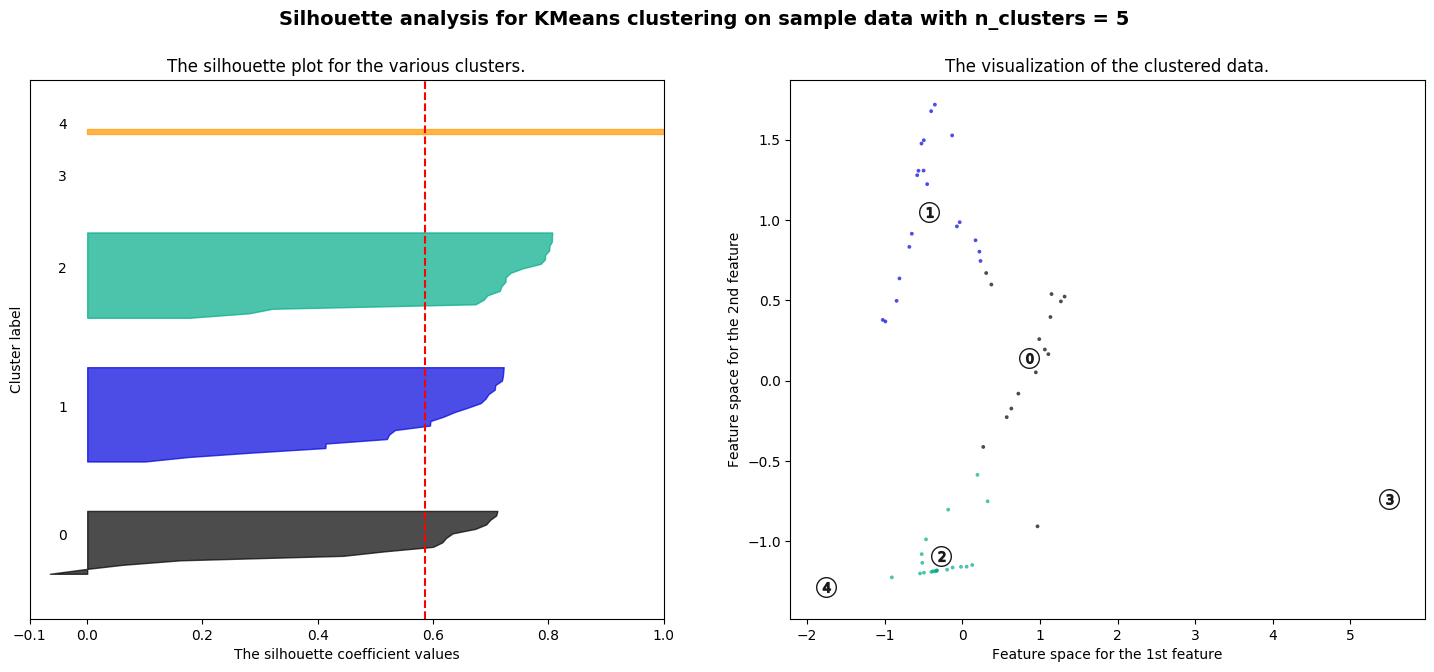

For n_clusters = 6 The silhouette_score is : 0.5390221585489609


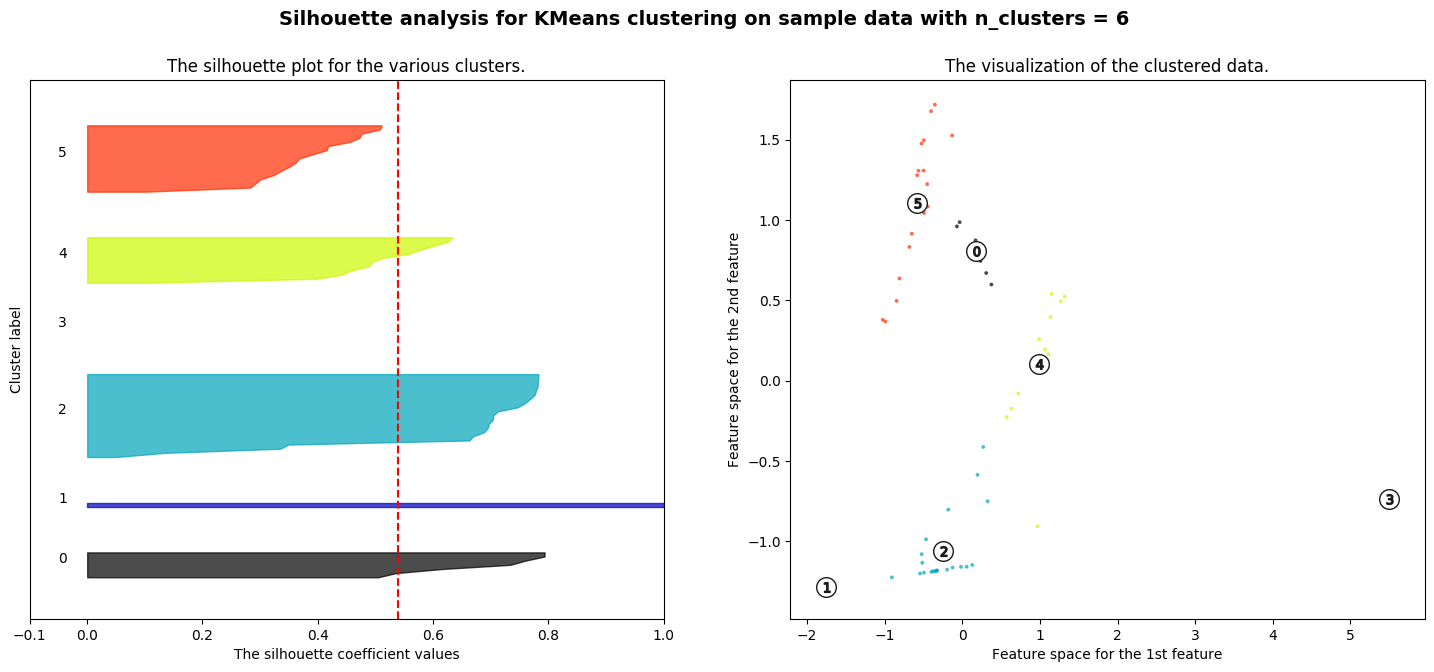

For n_clusters = 7 The silhouette_score is : 0.5935026755347806


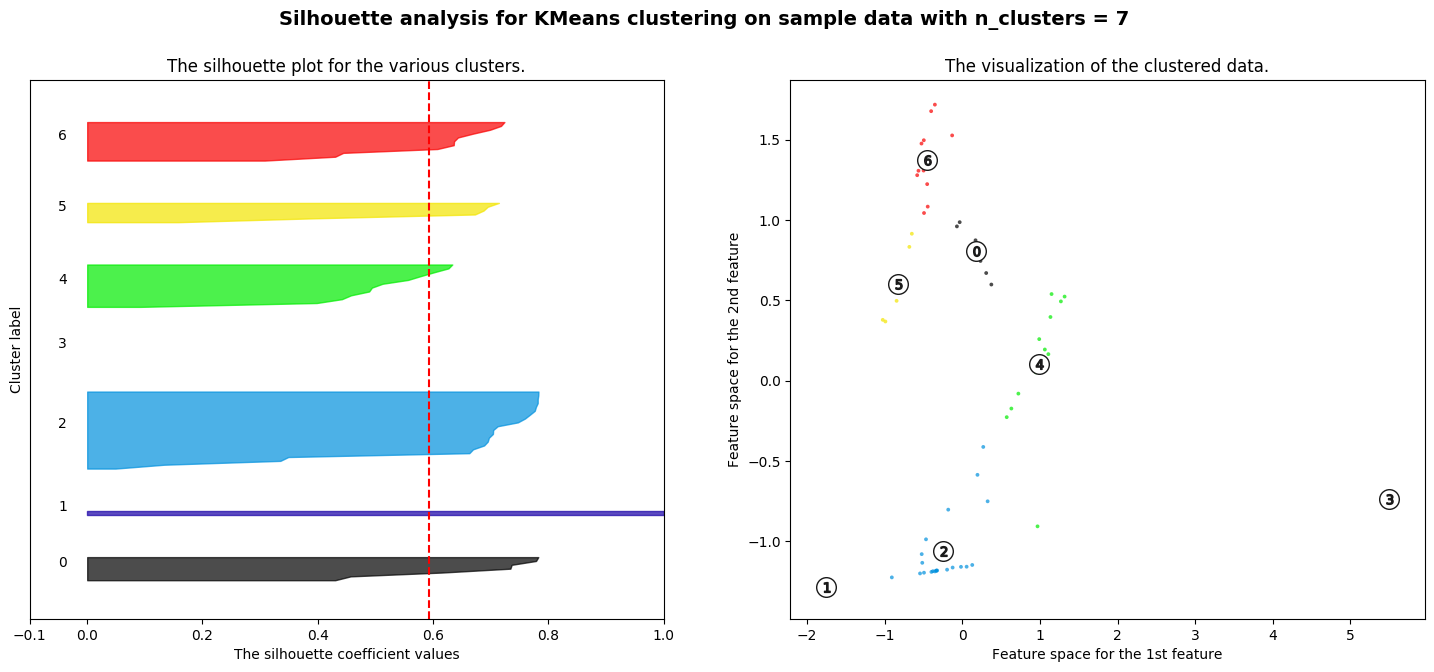

For n_clusters = 8 The silhouette_score is : 0.6123756884921574


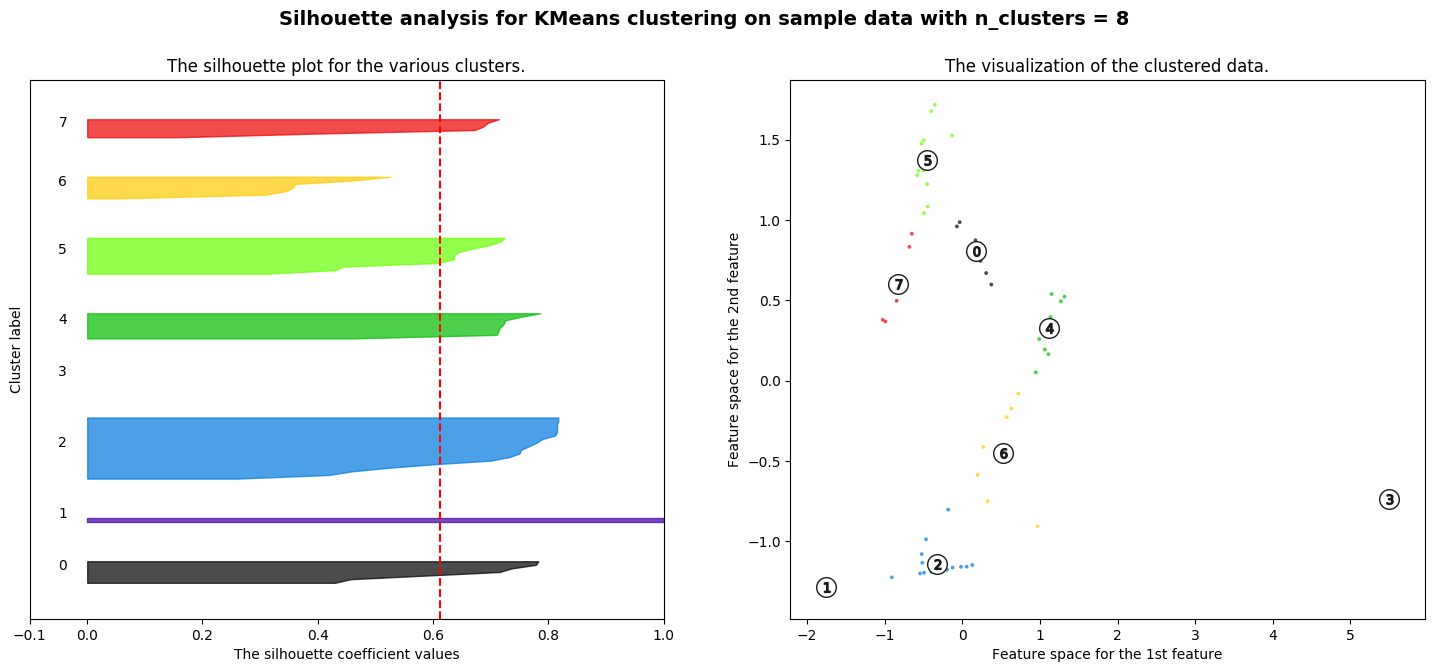

For n_clusters = 9 The silhouette_score is : 0.5482181156594568


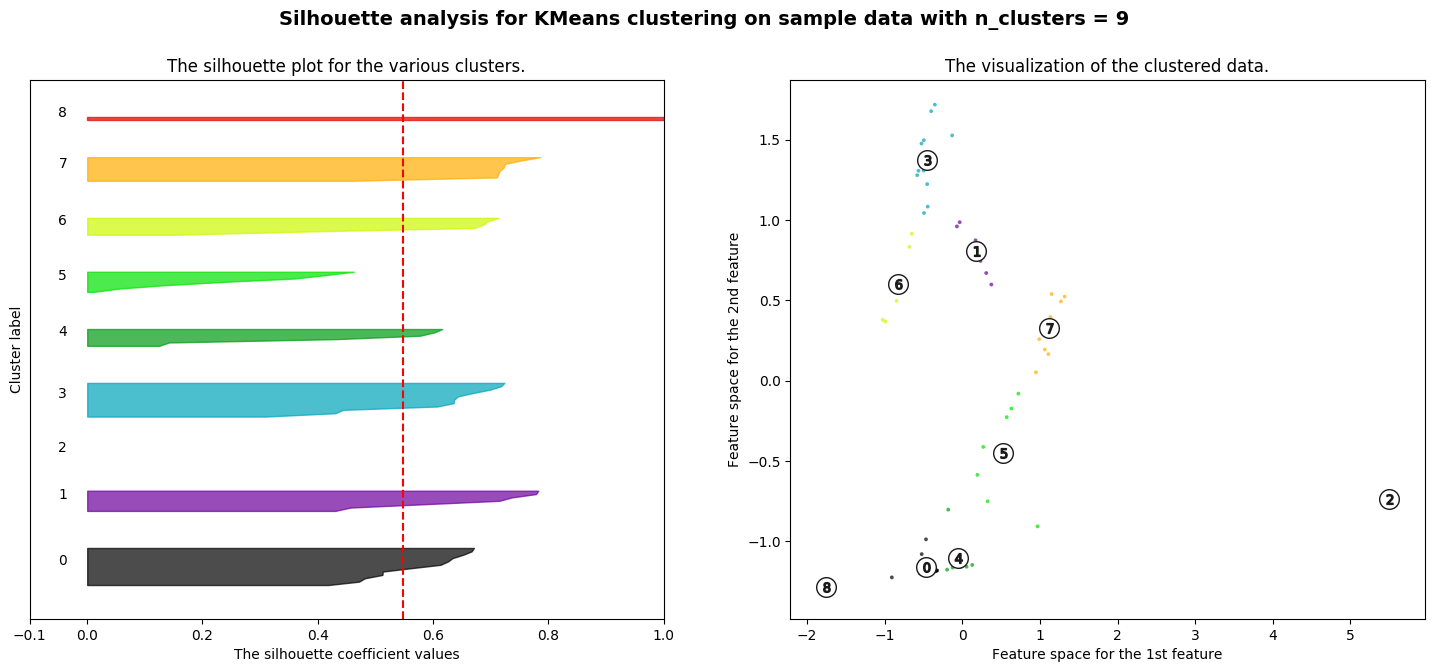

For n_clusters = 10 The silhouette_score is : 0.5406569441337312


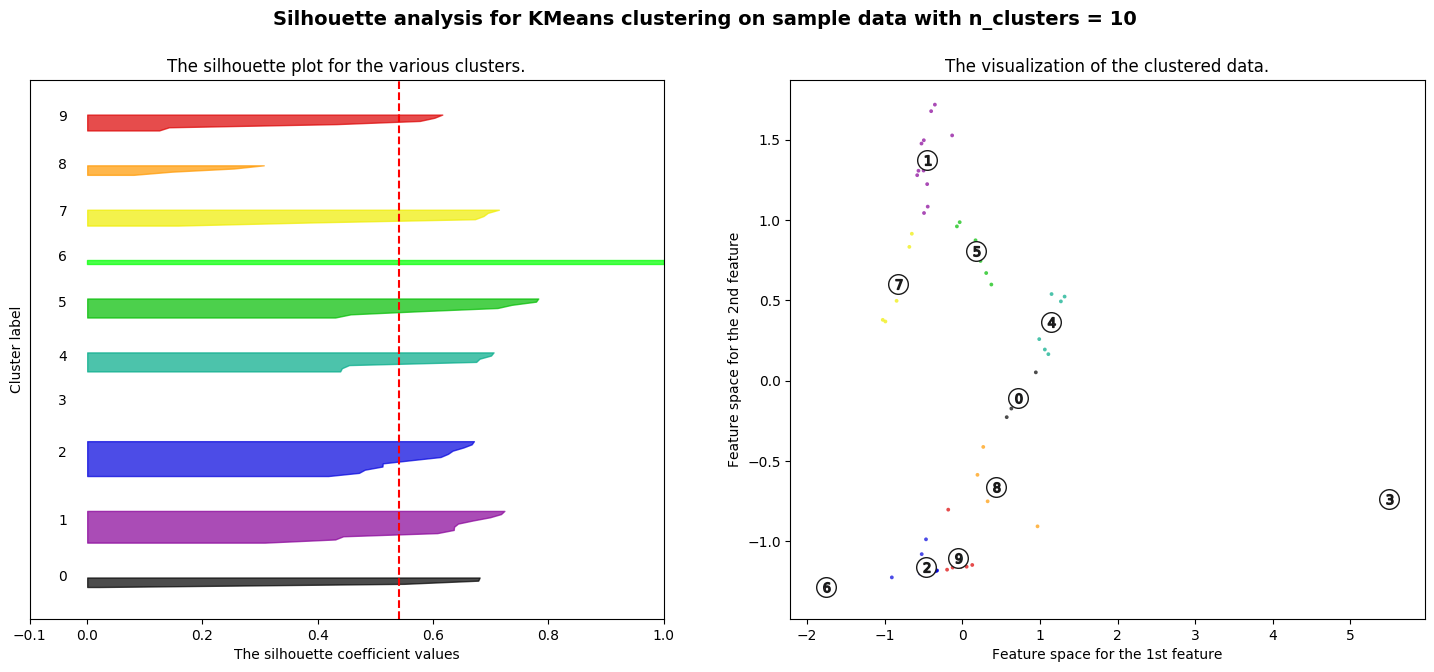

For n_clusters = 11 The silhouette_score is : 0.507982285430374


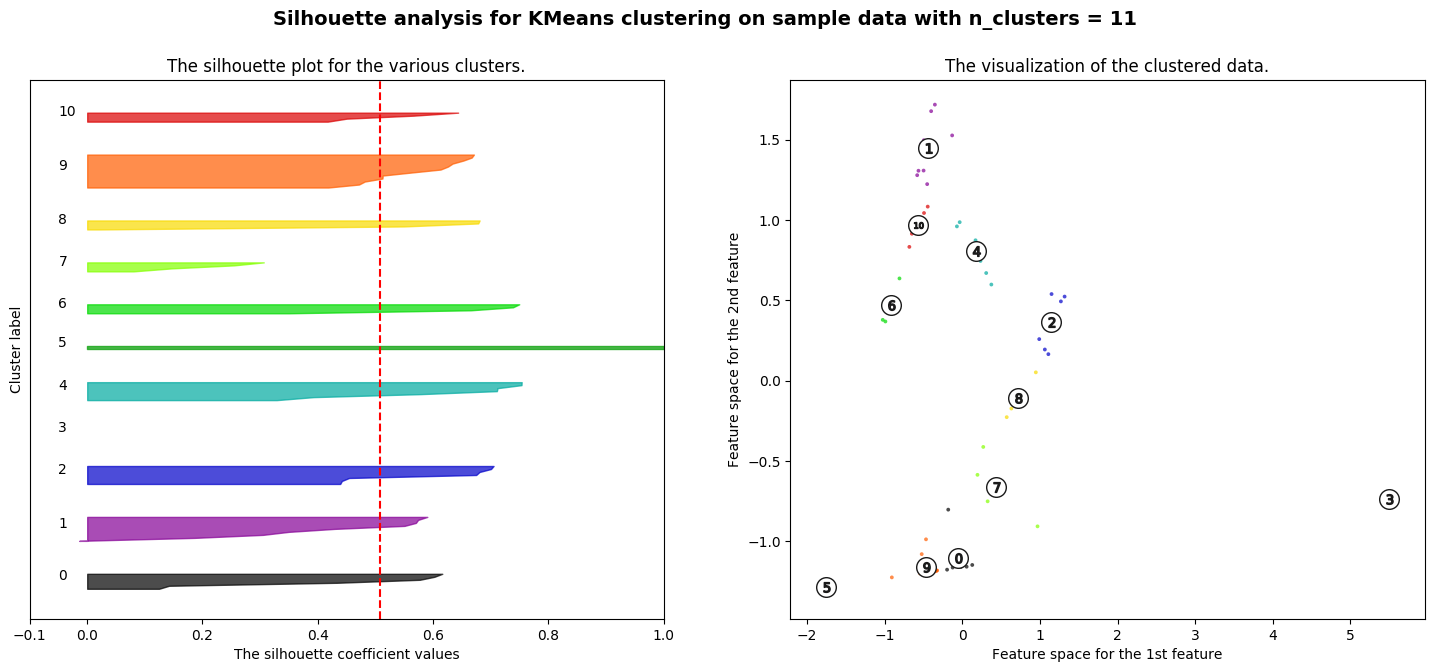

For n_clusters = 12 The silhouette_score is : 0.5339600369518445


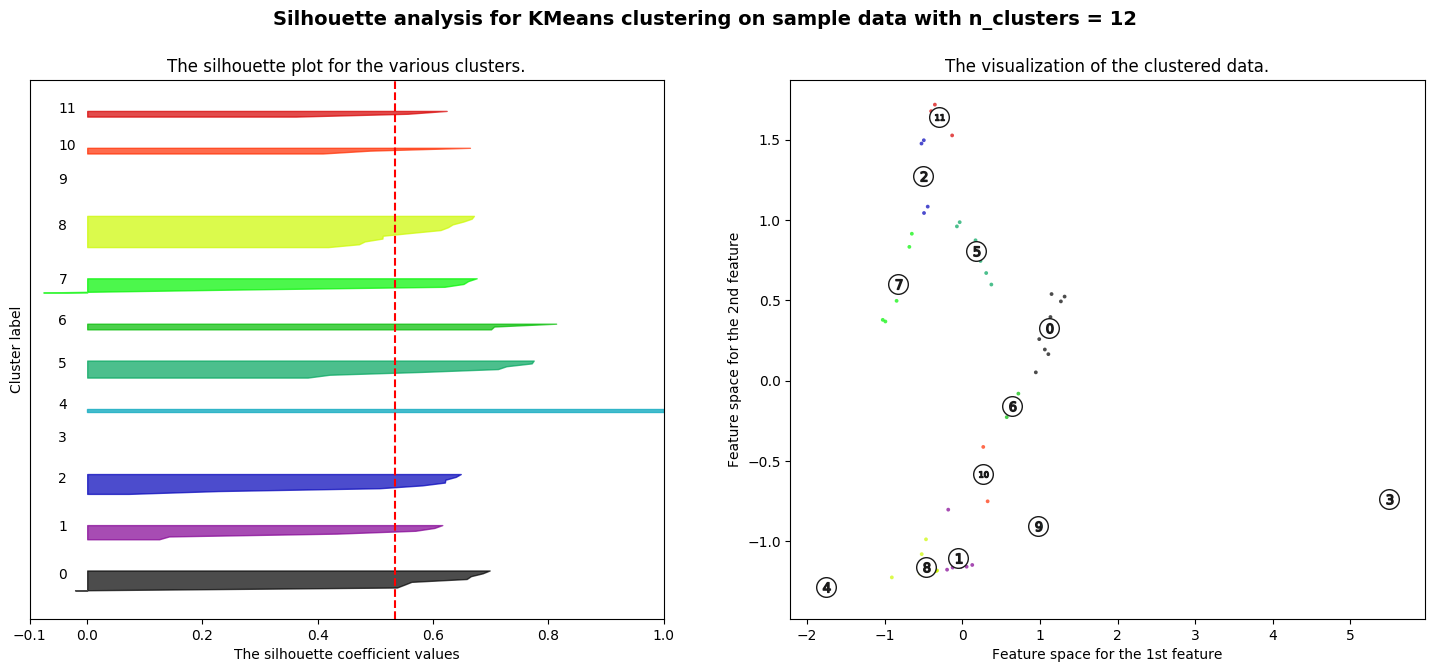

For n_clusters = 13 The silhouette_score is : 0.5385711027023876


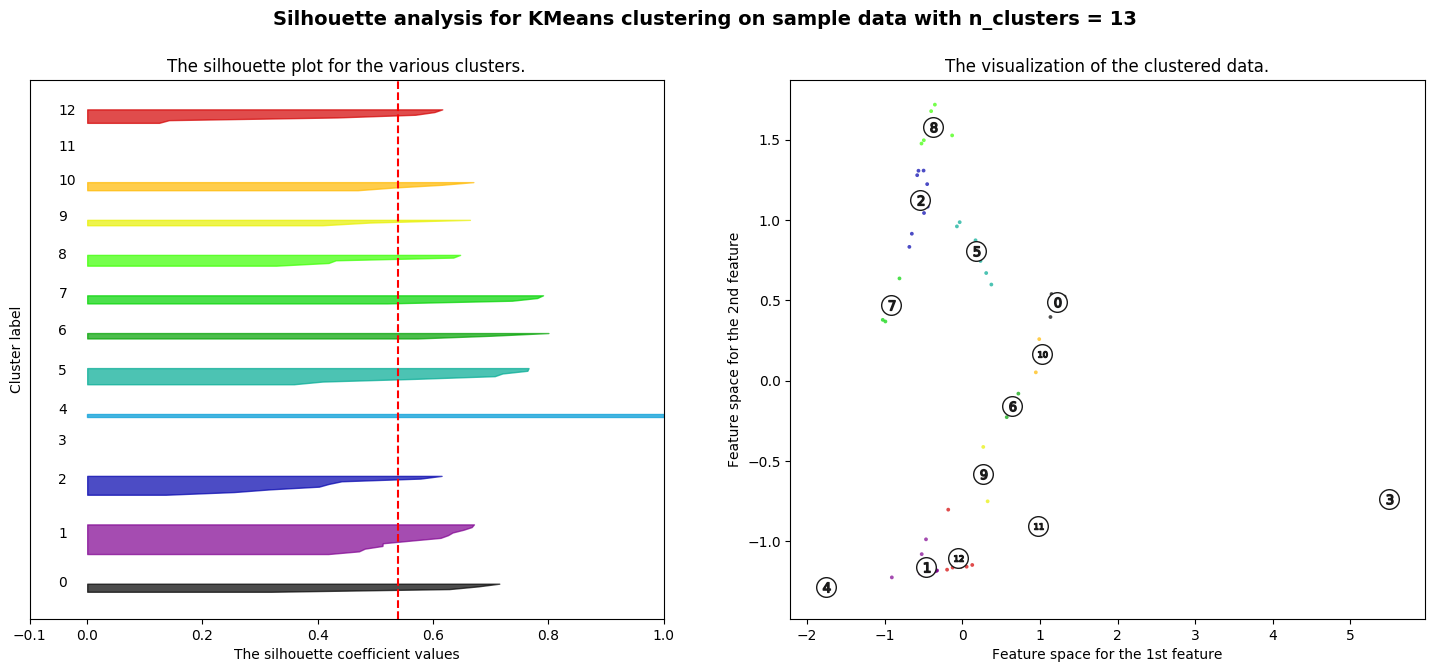

For n_clusters = 14 The silhouette_score is : 0.5386760929810037


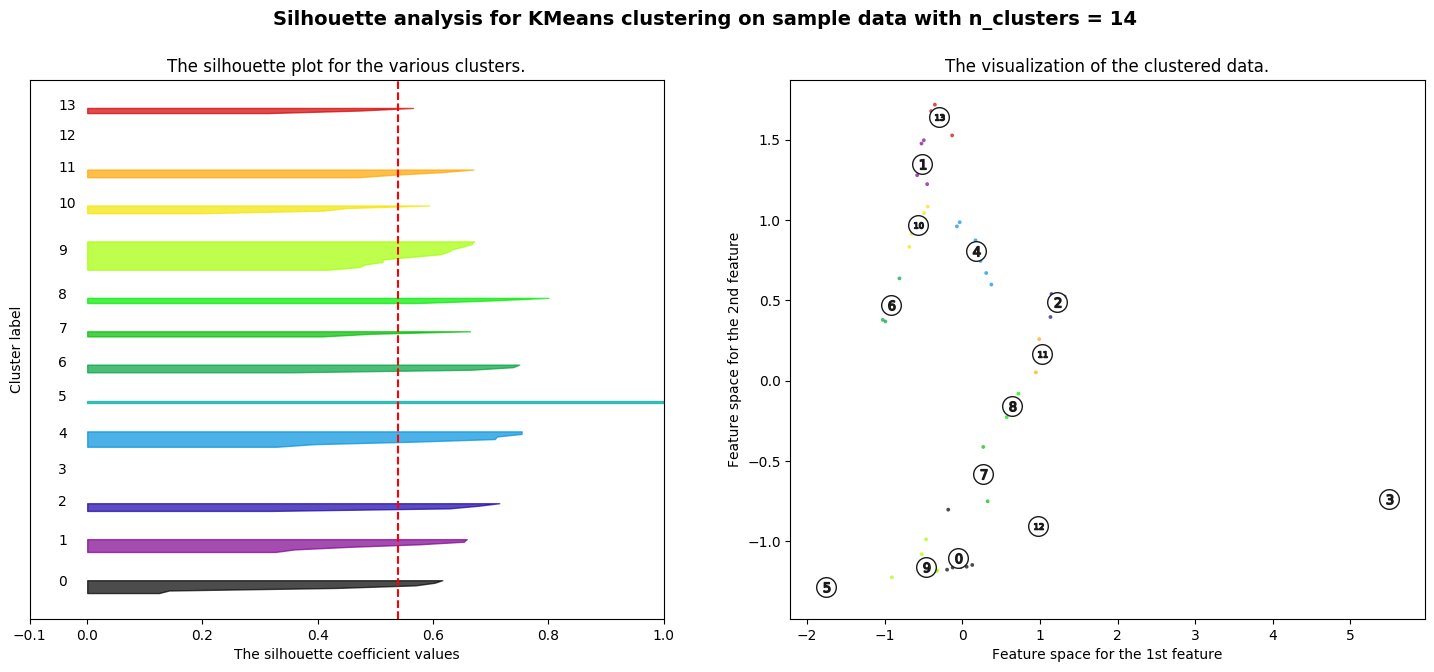

For n_clusters = 15 The silhouette_score is : 0.5423026006577719


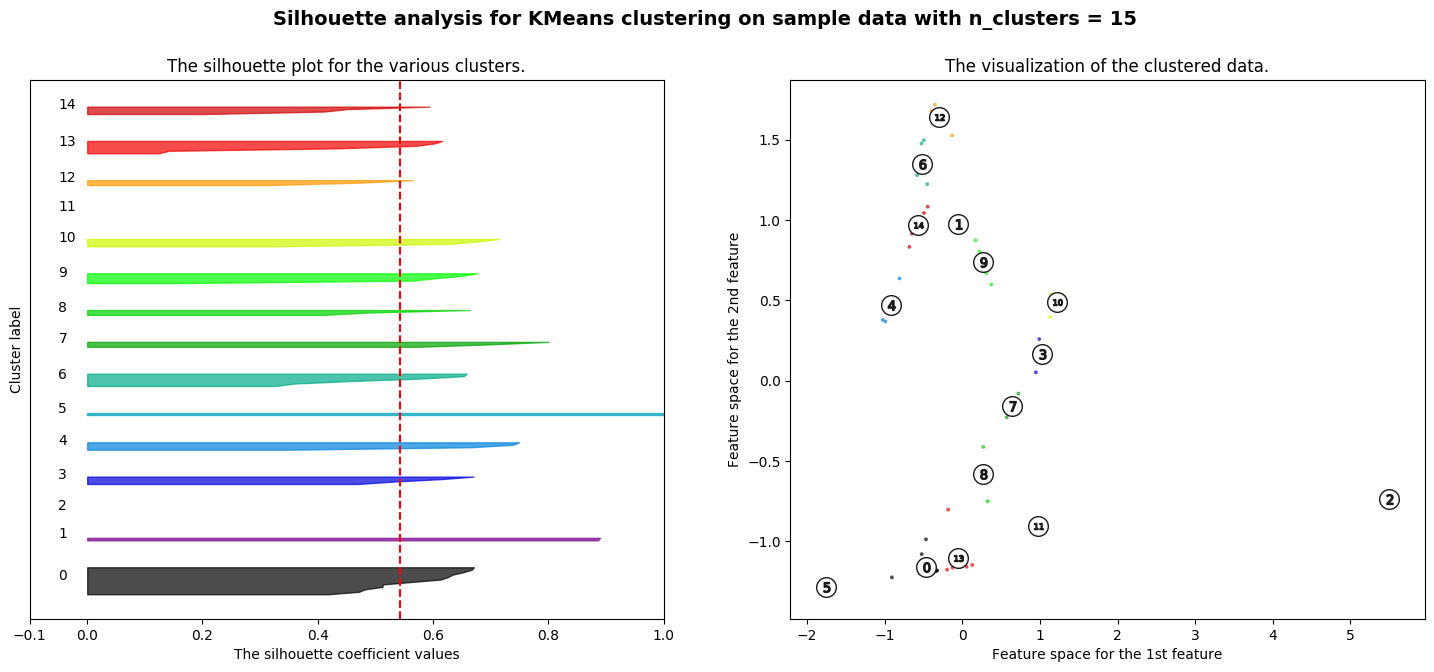

For n_clusters = 20 The silhouette_score is : 0.5137040711416411


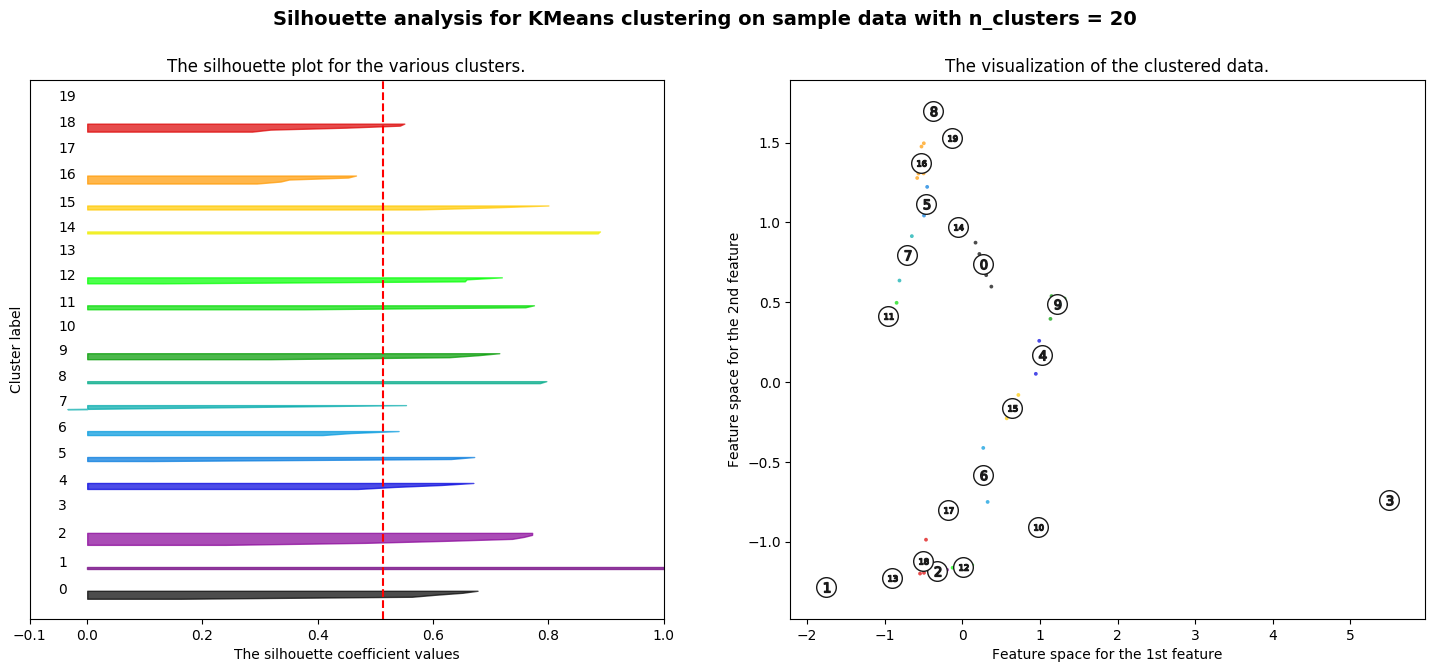

In [ ]:
###Step 8 Finally, using silhouette analysis to validate the k parameter = 8  (the best number of clusters), which was determined in step8 . 

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = [5,6,7,8,9,10,11,12,13,14,15,20]


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette coefficient of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 5 The calinski_harabasz_score is : [113.06037118731207]
For n_clusters = 5 The davies_bouldin_score is : [0.38181202979831214]
For n_clusters = 5 The silhouette_score is : [0.5840385407544668]
For n_clusters = 5 The cluster_score is : [12.794694825105415]
For n_clusters = 6 The calinski_harabasz_score is : [113.06037118731207, 118.78175477178196]
For n_clusters = 6 The davies_bouldin_score is : [0.38181202979831214, 0.4644902155750599]
For n_clusters = 6 The silhouette_score is : [0.5840385407544668, 0.5624316130740574]
For n_clusters = 6 The cluster_score is : [12.794694825105415, 9.834717875556317]
For n_clusters = 7 The calinski_harabasz_score is : [113.06037118731207, 118.78175477178196, 143.93983913623146]
For n_clusters = 7 The davies_bouldin_score is : [0.38181202979831214, 0.4644902155750599, 0.39820900282231136]
For n_clusters = 7 The silhouette_score is : [0.5840385407544668, 0.5624316130740574, 0.5935026755347806]
For n_clusters = 7 The cluster_score is : [1

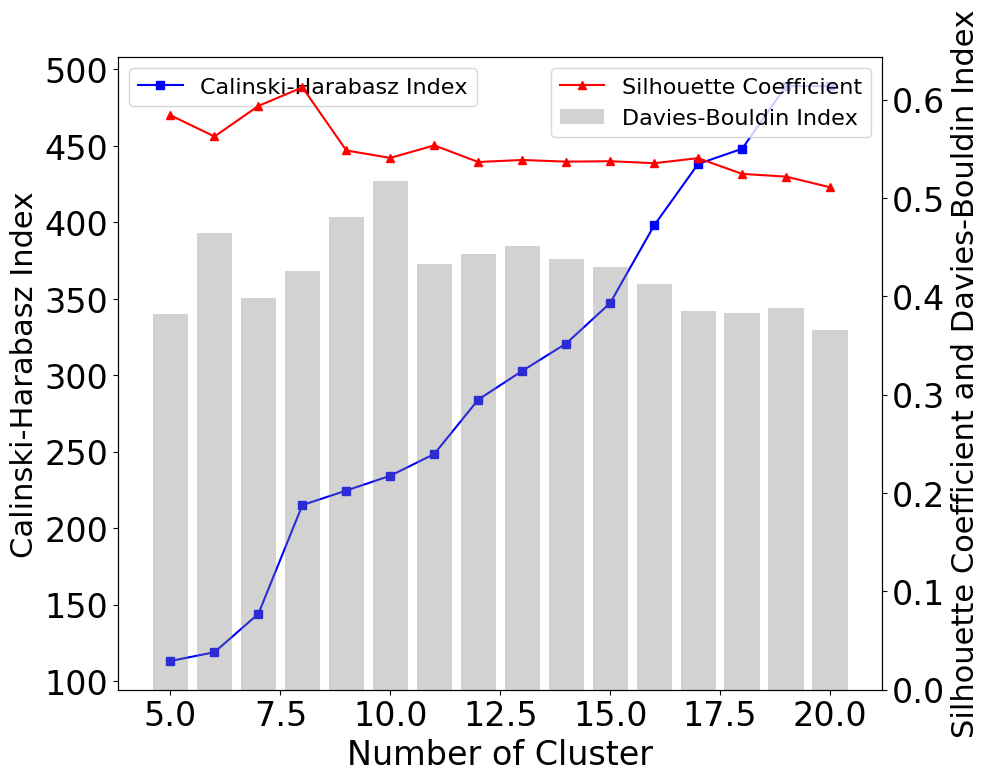

<Figure size 640x480 with 0 Axes>

In [ ]:
###Step 8  using 'calinski_harabasz_score, silhouette_score, davies_bouldin_score'analysis to find the best k=8 (the best number of clusters), which was determined in step8 . 

from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

calinski_harabasz_avg = []
davies_bouldin_avg = []
silhouette_avg = []
Model_scores = []

range_n_clusters = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for n_clusters in range_n_clusters:


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_pca)

    # The calinski_harabasz_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    calinski_harabasz_avg.append(calinski_harabasz_score(X_pca, cluster_labels))
    print("For n_clusters =", n_clusters,
          "The calinski_harabasz_score is :", calinski_harabasz_avg)
    
    davies_bouldin_avg.append(davies_bouldin_score(X_pca, cluster_labels))
    print("For n_clusters =", n_clusters,
          "The davies_bouldin_score is :", davies_bouldin_avg)
    
    silhouette_avg.append(silhouette_score(X_pca, cluster_labels))
    print("For n_clusters =", n_clusters,
          "The silhouette_score is :", silhouette_avg)
    
    Model_scores.append(-clusterer.score(X_pca))
    print("For n_clusters =",n_clusters,
          "The cluster_score is :", Model_scores)
    

fig, ax1= plt.subplots(figsize = [10,8])

ax1.plot(range_n_clusters,calinski_harabasz_avg, marker="s", color = 'blue',label = 'Calinski-Harabasz Index')
#ax1.bar(range_n_clusters,davies_bouldin_avg, color = 'green', label= 'davies_bouldin Index')
#ax1.plot(range_n_clusters,Model_scores,marker="D", color = 'yellow', label = 'model score')

ax1.set_xlabel('Number of Cluster',fontsize = 24)
ax1.set_ylabel('Calinski-Harabasz Index',fontsize = 22)
ax1.tick_params(axis="x", labelsize=24)
ax1.tick_params(axis="y", labelsize=24)
ax1.legend(loc = 'upper left',prop=dict(size=16));

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(range_n_clusters,silhouette_avg,marker="^", color = 'red', label = 'Silhouette Coefficient')
ax2.bar(range_n_clusters,davies_bouldin_avg, alpha=0.35, color = 'gray', label= 'Davies-Bouldin Index')
ax2.set_ylabel('Silhouette Coefficient and Davies-Bouldin Index',fontsize = 22)
ax2.tick_params(axis="x", labelsize=24)
ax2.tick_params(axis="y", labelsize=24)
ax2.legend(loc = 'upper right', prop=dict(size=16));

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.show()
plt.savefig("Keams_score.png", dpi = 800)


In [ ]:
print(calinski_harabasz_avg)


[113.06037118731207, 118.78175477178196, 143.93983913623146, 215.0479927365235, 224.55372695289063, 234.2322686131318, 248.45553587912735, 284.0388826175928, 302.81365682752505, 320.7235886194469, 347.22951985622615, 397.9707556336763, 438.194789740131, 448.09378581943776, 489.1819115038093, 489.10248834750746]


In [ ]:
print(silhouette_avg)

[0.5840385407544668, 0.5624316130740574, 0.5935026755347806, 0.6123756884921574, 0.5482181156594568, 0.5406569441337312, 0.5533745788626969, 0.5364808223804878, 0.5385711027023876, 0.53684362413814, 0.537294477145947, 0.5352592653842234, 0.5404188724988789, 0.5243888309255452, 0.5216285814882826, 0.5108170752759128]


In [ ]:
print(davies_bouldin_avg)

[0.38181202979831214, 0.4644902155750599, 0.39820900282231136, 0.4255430488098394, 0.4808667790126429, 0.517630949900884, 0.43241839914316044, 0.4427716156940438, 0.4514655634248729, 0.4376928053775888, 0.42981478341110824, 0.4124760827811277, 0.38527311376464574, 0.3827423185584204, 0.38846207917726155, 0.3659750975114523]


In [ ]:
###Step 9: We have found the Kmeans model with n=8 has best performance (n_clusters = 8 The silhouette_score is : 0.9346281334133967).
# This step we will evaluate the Kmeans model when n or k was set to be 6

#10.1Re-build the Kmeans model by changing 'n_clusters' from 2 to 8

kmeans_model = KMeans(n_clusters=8, n_init=6, init='random', max_iter=5) # update Kmeans model with 6 cluster numbers

#10.2 fit model and predict 
y_pred_new=kmeans_model.fit_predict(X_pca)


array([6, 6, 6, 6, 6, 6, 6, 6, 1, 2, 2, 4, 4, 6, 6, 6, 4, 6, 6, 6, 6, 6,
       6, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 5, 3, 0, 3,
       3, 3, 3, 5, 5, 5, 5, 3, 3, 3, 7, 0, 3, 3, 5, 3], dtype=int32)

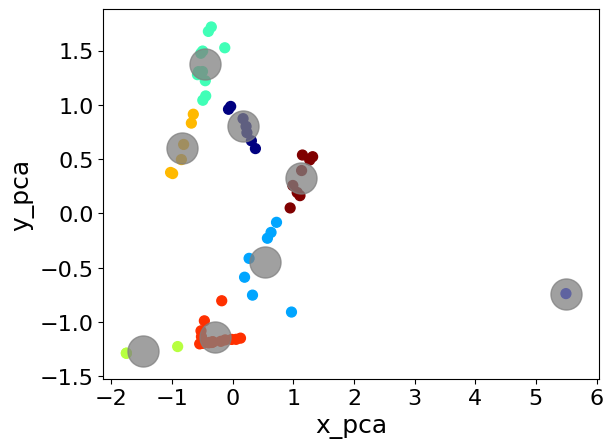

In [ ]:
###Step 10: visualize the X-results with the updated Kmeans model (n=8)                        

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_new,  marker="o", s=50, cmap='jet')

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='gray', s=500, alpha=0.75)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('x_pca', fontsize = 18)
plt.ylabel('y_pca', fontsize = 18);

In [ ]:
###Step 11 Re-evaluate the Kmeans model where the model with 'n or k=6' was fially found has the best performance

#11.1 using accuracy_score function
from sklearn.metrics import accuracy_score
accuracy_score(y_true,y_pred_new)

0.016666666666666666

In [ ]:
#11.1 using homogeneity_completeness_v_measure function to compute the homogeneity, completeness, and v-Measure scores at once
from sklearn import metrics
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
homogeneity_completeness_v_measure(labels_true = y_true, labels_pred = y_pred_new) 

(1.0, -5.884858660335615e-17, -1.1769717320671232e-16)